# Fase 4:

## Agrupamento de horários por feridos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('https://raw.githubusercontent.com/Thiagorcj/Projeto-ICD/main/Acidentes_2021.csv', sep=';', engine='python', encoding='latin-1')

#Função para aproximar os horários:
def horario(x):
  x,y,z = x.split(':')
  x,y,z = int(x),int(y),int(z)
  if z>30: 
    y +=1
    z = 0
  elif z<30: z = 0
  if y>30: 
    x+=1 
    y = 0
  elif y<0: y=0
  if x == 24: x = 0
  return x

df['Horarios'] = df['horario'].apply(horario)
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,Horarios
0,331693,01/01/2021,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,...,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02,0
1,331694,01/01/2021,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,...,0,0,2,1,"-23,46634923","-51,82808011",SR-PR,UOP01,DEL09,0
2,331696,01/01/2021,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,...,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06,0
3,331699,01/01/2021,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,...,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04,1
4,331701,01/01/2021,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,...,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01,0


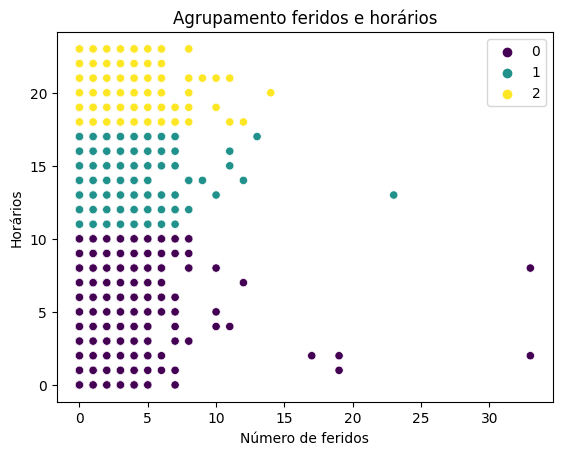

In [12]:
df_group = df[["feridos", "Horarios"]]
kmeans = KMeans(n_clusters=3,n_init='auto')
kmeans.fit(df_group)
KMeans(n_clusters=3)
plt.title("Agrupamento feridos e horários")
sns.scatterplot(data=df_group, x="feridos", y="Horarios", hue=kmeans.labels_,palette="viridis")
plt.xlabel("Número de feridos")
plt.ylabel("Horários")
plt.show()

Agrupamento é formado por esses grupos: 
- Grupo 0: acidentes que ocorreram entre 10 e 15 horas; 
- Grupo 1: acidentes que ocorreram entre 0 até 10 horas;
- Grupo 2: acidentes que ocorreram de 15 até 23 horas.


A partir da análise é perceptível que no horário da manhã (Grupo 1) ocorreram acidentes com maior número de feridos.

## Agrupamento mortes por gravemente feridos:

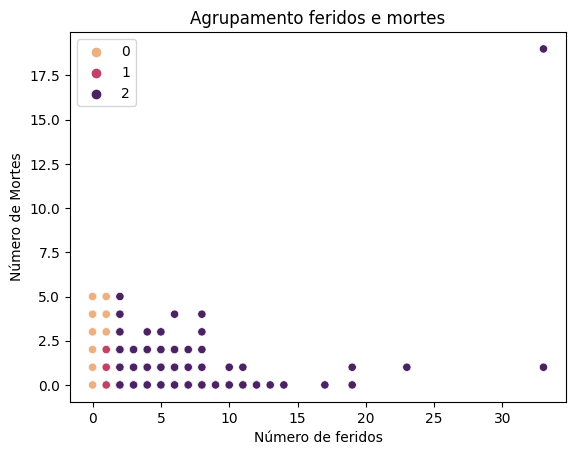

In [9]:
df_group = df[["feridos", "mortos"]]
kmeans = KMeans(n_clusters=3,n_init='auto')
kmeans.fit(df_group)
KMeans(n_clusters=3)
plt.title("Agrupamento feridos e mortes")
sns.scatterplot(data=df_group, x="feridos", y="mortos", hue=kmeans.labels_,palette="flare")
plt.xlabel("Número de feridos")
plt.ylabel("Número de Mortes")
plt.show()

Atráves de tal agrupamento percebe-se que é possível dividir os acidentes em três grupos distintos, sendo:
- Grupo 1: grupo que não houve feridos mas houve  mortes; 
- Grupo 0: formado por acidentes que houve um número um pouco maior de mortes se comparado ao número de feridos;
- Grupo 2: formado por acidentes que houve um número maior de feridos se comparado ao de mortes. 

A partir dessa gráfico pode-se ter uma ideia do quão fatais os acidentes foram nesse período. Nesse sentido, os grupos 1 e 0 seriam os mais fatais (excluindo os casos que teriam 0 mortes e 0 feridos), levando em consideração que o número de mortes e maior que o de feridos, ou seja, a chance de não resistir ao acidente era maior. Já o Grupo 2 é formado por acidentes que houveram mais feridos que mortes, então a chance de sobreviver foi maior. Portanto, tendo em vista tais observações, conclui-se que a maior parte dos acidentes que houve mortes ou feridos pertence ao grupo 2, ou seja, houve um número de sobreviventes maior que o de mortos.

## Agrupamento de pessoas por número de mortos:

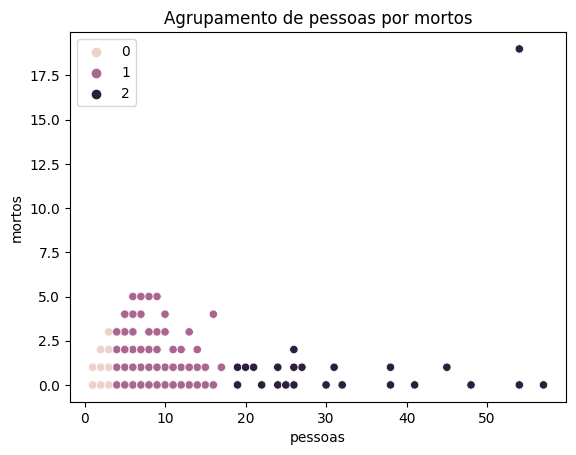

In [10]:
df_group = df[['pessoas','mortos']]
kmeans = KMeans(n_clusters= 3,n_init='auto')
kmeans.fit(df_group)
plt.title("Agrupamento de pessoas por mortos")
sns.scatterplot(data= df, x= 'pessoas', y= 'mortos', hue= kmeans.labels_)
plt.show()

Atráves de tal agrupamento percebe-se que é possível dividir os acidentes em três grupos distintos:
- Grupo 0: formado por acidentes que houveram menos de 3 pessoas envolvidas; 
- Grupo 1: formado por acidentes que houveram entre 10 e 20 pessoas envolvidas aproximadamente; 
- Grupo 2: formado por acidentes que houveram mais de 20 pessoas envolvidas. 

Ao observar tal gráfico, é notório que a maior parte dos acidentes não é fatal, pois o número de mortes permaneceu constante e baixo se comparado ao número de pessoas envolvidas. Em contrapartida, houveram acidentes em que houve apenas 3 pessoas envolvidas e o mesmo número de mortes. 

## Agrupamento de ilesos por pessoas

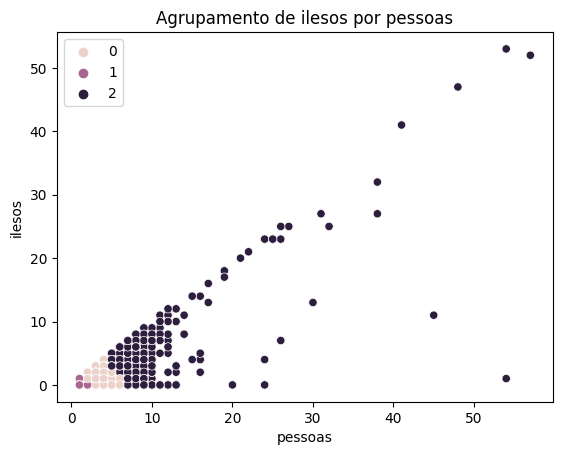

In [11]:
df_group = df[['pessoas','ilesos']]
kmeans = KMeans(n_clusters= 3,n_init='auto')
kmeans.fit(df_group)
plt.title("Agrupamento de ilesos por pessoas")
sns.scatterplot(data= df, x= 'pessoas', y= 'ilesos', hue= kmeans.labels_)
plt.show()

Agrupamento ocorre da seguinte forma: 
- Grupo 0: formado por acidentes que tiveram menos de 5 pessoas envolvidas; 
- Grupo 2: formado por acidentes que tiveram menos de 25 e mais de 5 pessoas envolvidas; 
- Grupo 1: formado por acidentes que envolveram mais de 25 pessoas envolvidas. 

Ao analisar o gráfico percebe-se que o aumento de pessoas envolvidas é proporcional ao aumento de ilesos em todos os grupos.